In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [4]:
files = {
    '2016':"root://xrootd-cms.infn.it//store/mc/RunIISummer20UL16NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/2520000/C1E3DAF2-74E4-864B-AC86-FA1A9F5E650A.root",
    #'2017':"root://xrootd-cms.infn.it//store/mc/RunIISummer20UL17NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v2/100000/095AB6AF-92D0-804D-A7F8-EB93512E39B5.root",
    '2018':"root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v2/100000/19922B78-283B-CD48-8A3D-0308D48A824A.root",
}
events = {}
for year, filename in files.items():
    events[year] = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=100).events()

In [5]:
for year, filename in files.items():
    triggers = events[year].HLT.fields
    flags    = events[year].Flag.fields
    #print(year, [t for t in triggers if t.startswith('IsoMu24')])
    #print(year, [t for t in triggers if t.startswith('IsoTkMu24')])
    #print(year, [t for t in triggers if t.startswith('IsoMu27')])
    #print()
    print(year, [t for t in triggers if t.startswith('Ele27_WPTight_Gsf')])
    print(year, [t for t in triggers if t.startswith('Ele32_WPTight_Gsf_L1DoubleEG')])
    print(year, [t for t in triggers if t.startswith('Ele28_eta2p1_WPTight_Gsf_HT150')])
    print(year, [t for t in triggers if t.startswith('Ele32_WPTight_Gsf')])
    print(year, [t for t in triggers if 'Flag' in t])
    print(year, [f for f in flags if 'ele32' in f])
    print()

2016 ['Ele27_WPTight_Gsf', 'Ele27_WPTight_Gsf_L1JetTauSeeded']
2016 []
2016 []
2016 ['Ele32_WPTight_Gsf']
2016 []
2016 []

2018 ['Ele27_WPTight_Gsf']
2018 ['Ele32_WPTight_Gsf_L1DoubleEG']
2018 ['Ele28_eta2p1_WPTight_Gsf_HT150']
2018 ['Ele32_WPTight_Gsf', 'Ele32_WPTight_Gsf_L1DoubleEG']
2018 []
2018 []



In [ ]:
files_data = {
    '2017B':"/pnfs/psi.ch/cms/trivcat/store/data/Run2017B/SingleElectron/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/120000/20867FA7-22D4-CC46-BE86-EE9FA1C846B6.root",
    '2017C':"/pnfs/psi.ch/cms/trivcat/store/data/Run2017C/SingleElectron/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/120000/090D7428-C0D1-7043-982A-C5E8811BD58D.root",
    '2017D':"/pnfs/psi.ch/cms/trivcat/store/data/Run2017D/SingleElectron/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/120000/1DCECCB7-D2E5-DF43-AC8A-68E4E7905AD7.root"
}
events_data = {}
for year, filename in files_data.items():
    events_data[year] = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=100).events()

In [ ]:
for year, filename in files_data.items():
    triggers = events_data[year].HLT.fields
    flags    = events_data[year].Flag.fields
    print(year, [t for t in triggers if t.startswith('IsoMu24')])
    print(year, [t for t in triggers if t.startswith('IsoTkMu24')])
    print(year, [t for t in triggers if t.startswith('IsoMu27')])
    #print()
    #print(year, [t for t in triggers if t.startswith('Ele')])
    #print(year, [t for t in triggers if t.startswith('Ele27_WPTight_Gsf')])
    #print(year, [t for t in triggers if t.startswith('Ele32_WPTight_Gsf_L1DoubleEG')])
    #print(year, [t for t in triggers if t.startswith('Ele28_eta2p1_WPTight_Gsf_HT150')])
    #print(year, [t for t in triggers if t.startswith('Ele32_WPTight_Gsf')])
    #print(year, [t for t in triggers if 'Flag' in t])
    #print(year, [f for f in flags if 'ele32' in f])
    print()

In [ ]:
t1 = np.array(events['2017B'].HLT.Ele32_WPTight_Gsf_L1DoubleEG, dtype=int)
t2 = np.array(events['2017B'].HLT.Ele28_eta2p1_WPTight_Gsf_HT150, dtype=int)

In [ ]:
plt.hist(t1, alpha=0.5, label='Ele32');
plt.hist(t2, alpha=0.5, label='Ele28');
plt.legend();

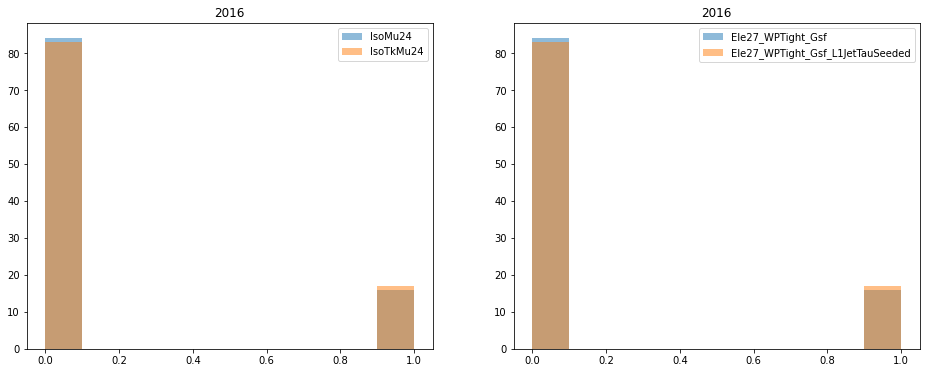

In [6]:
t1 = np.array(events['2016'].HLT.IsoMu24, dtype=int)
t2 = np.array(events['2016'].HLT.IsoTkMu24, dtype=int)
t3 = np.array(events['2016'].HLT.Ele27_WPTight_Gsf, dtype=int)
t4 = np.array(events['2016'].HLT.Ele27_WPTight_Gsf_L1JetTauSeeded, dtype=int)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,6])
ax1.hist(t1, alpha=0.5, label='IsoMu24');
ax1.hist(t2, alpha=0.5, label='IsoTkMu24');
ax1.set_title("2016")
ax1.legend();

ax2.hist(t1, alpha=0.5, label='Ele27_WPTight_Gsf');
ax2.hist(t2, alpha=0.5, label='Ele27_WPTight_Gsf_L1JetTauSeeded');
ax2.set_title("2016")
ax2.legend();

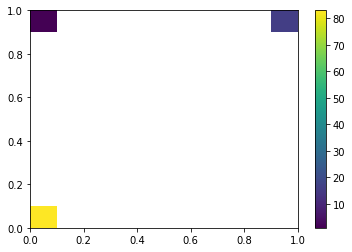

In [15]:
plt.hist2d(t1, t2, density=True, cmin=0.0001);
plt.colorbar();

In [ ]:
t1 = np.array(events['2017'].HLT.IsoMu27, dtype=int)
t3 = np.array(events['2017'].HLT.Ele32_WPTight_Gsf_L1DoubleEG, dtype=int)
t4 = np.array(events['2017'].HLT.Ele28_eta2p1_WPTight_Gsf_HT150, dtype=int)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,6])
ax1.hist(t1, alpha=0.5, label='IsoMu27');
ax1.set_title("2017")
ax1.legend();

ax2.hist(t1, alpha=0.5, label='Ele32_WPTight_Gsf_L1DoubleEG');
ax2.hist(t2, alpha=0.5, label='Ele28_eta2p1_WPTight_Gsf_HT150');
ax2.set_title("2017")
ax2.legend();

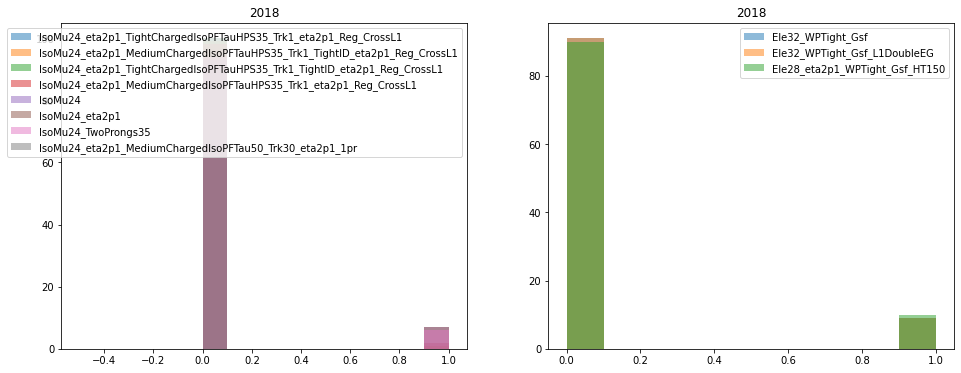

In [7]:
triggers_mu = [
                "IsoMu24_eta2p1_TightChargedIsoPFTauHPS35_Trk1_eta2p1_Reg_CrossL1",
                "IsoMu24_eta2p1_MediumChargedIsoPFTauHPS35_Trk1_TightID_eta2p1_Reg_CrossL1",
                "IsoMu24_eta2p1_TightChargedIsoPFTauHPS35_Trk1_TightID_eta2p1_Reg_CrossL1",
                "IsoMu24_eta2p1_MediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg_CrossL1",
                "IsoMu24",
                "IsoMu24_eta2p1",
                "IsoMu24_TwoProngs35",
                "IsoMu24_eta2p1_MediumChargedIsoPFTau50_Trk30_eta2p1_1pr"
]

triggers_ele = [
                "Ele32_WPTight_Gsf",
                "Ele32_WPTight_Gsf_L1DoubleEG",
                "Ele28_eta2p1_WPTight_Gsf_HT150"
]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,6])
for t in triggers_mu:
    ax1.hist(np.array(events['2018'].HLT[t], dtype=int), alpha=0.5, label=t);
ax1.set_title("2018")
ax1.legend();

for t in triggers_ele:
    ax2.hist(np.array(events['2018'].HLT[t], dtype=int), alpha=0.5, label=t);
ax2.set_title("2018")
ax2.legend();